# Data Loading and Initial Exploration

In [1]:
# Import necessary libraries and modules
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Define the path to the dataset
dataset_path = 'G:\\UNDERSTANDING AI\\flower_photos (1)\\flower_photos'

# Parameters for the data loading
batch_size = 32
img_height = 180
img_width = 180

# Data Augmentation and Preprocessing
# Splitting the data into training and validation sets, with data augmentation applied to both
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% of the data will be used as the validation set
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preparing the training data generator
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'  # Set as training data
)

# Preparing the validation data generator
validation_generator = train_datagen.flow_from_directory(
    dataset_path,  # Same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'  # Set as validation data
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


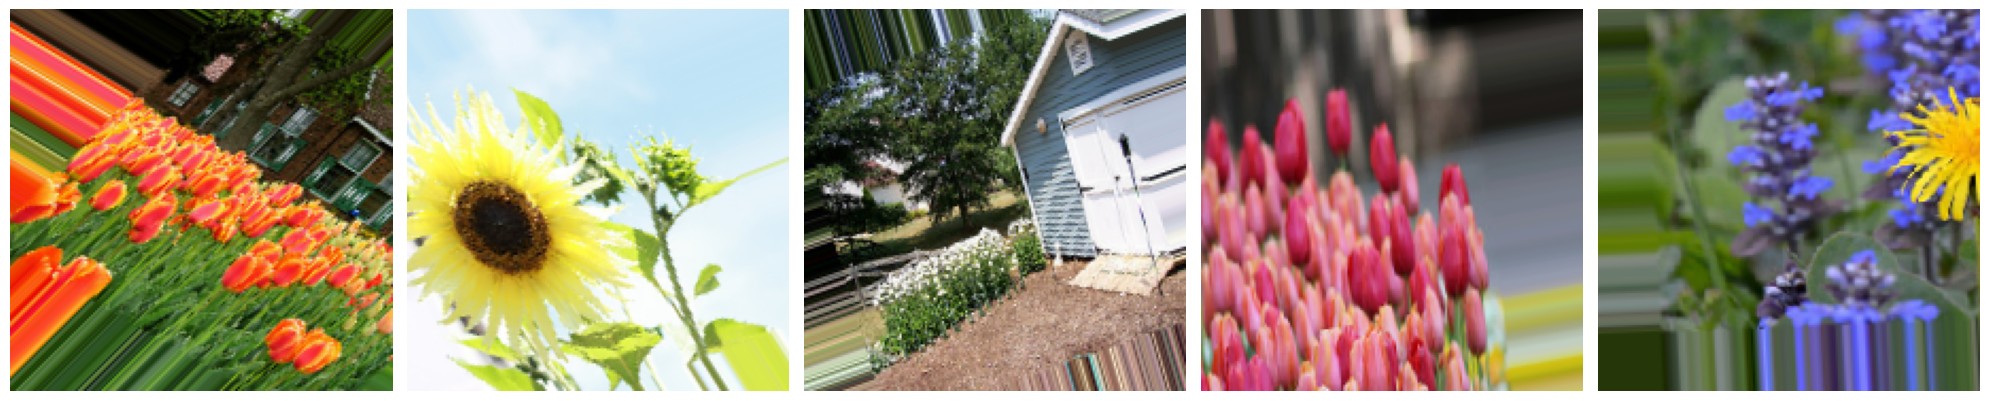

In [3]:
# Displaying a batch of images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images from the training generator and display them
sample_training_images, _ = next(train_generator)
plot_images(sample_training_images[:5])  # Display the first 5 images

# Model Building

In [4]:
# CNN Architecture
# Building the sequential model with convolutional, max-pooling, flatten, dropout, and dense layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Training
# Fit the model on the training data and validate on the validation data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
91/91 [==============================] - 2054s 23s/step - loss: 1.2981 - accuracy: 0.4149 - val_loss: 1.2026 - val_accuracy: 0.5099
Epoch 2/10
91/91 [==============================] - 1933s 21s/step - loss: 1.0550 - accuracy: 0.5621 - val_loss: 1.0128 - val_accuracy: 0.5696
Epoch 3/10
91/91 [==============================] - 1982s 22s/step - loss: 0.9427 - accuracy: 0.6209 - val_loss: 0.9592 - val_accuracy: 0.6094
Epoch 4/10
91/91 [==============================] - 1858s 20s/step - loss: 0.8878 - accuracy: 0.6395 - val_loss: 0.9991 - val_accuracy: 0.6080
Epoch 5/10
91/91 [==============================] - 1969s 22s/step - loss: 0.8602 - accuracy: 0.6646 - val_loss: 0.8905 - val_accuracy: 0.6420
Epoch 6/10
91/91 [==============================] - 1890s 21s/step - loss: 0.8009 - accuracy: 0.6969 - val_loss: 0.8571 - val_accuracy: 0.6619
Epoch 7/10
91/91 [==============================] - 4577s 51s/step - loss: 0.7899 - accuracy: 0.6928 - val_loss: 0.8836 - val_accuracy: 0.6548

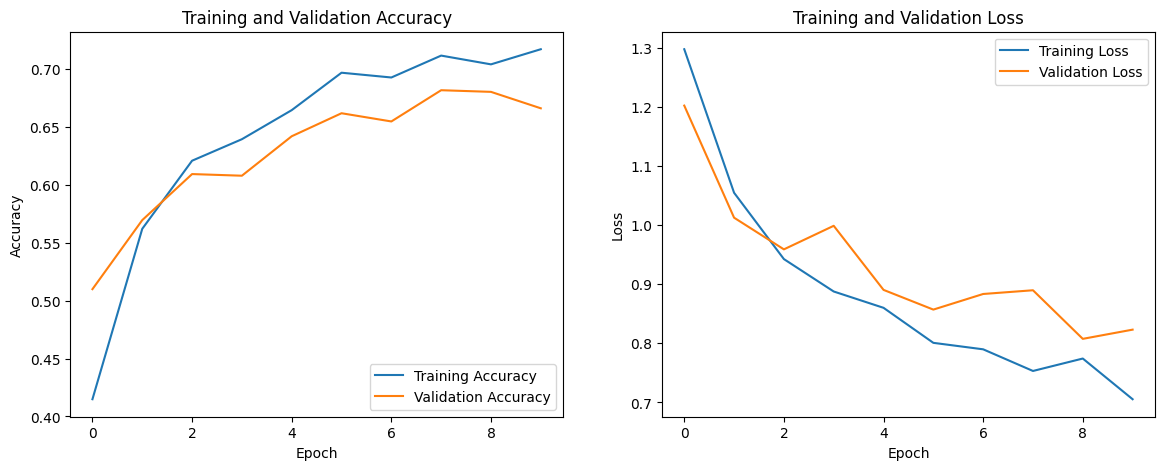

In [6]:
# Plotting Performance Metrics
# Visualizing training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs_range
epochs_range = range(len(acc))

# Plotting Performance Metrics
# Visualizing training and validation accuracy and loss
plt.figure(figsize=(14, 5))

# Plotting training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Showing the plots
plt.show()

23/23 [==============================] - 428s 19s/step


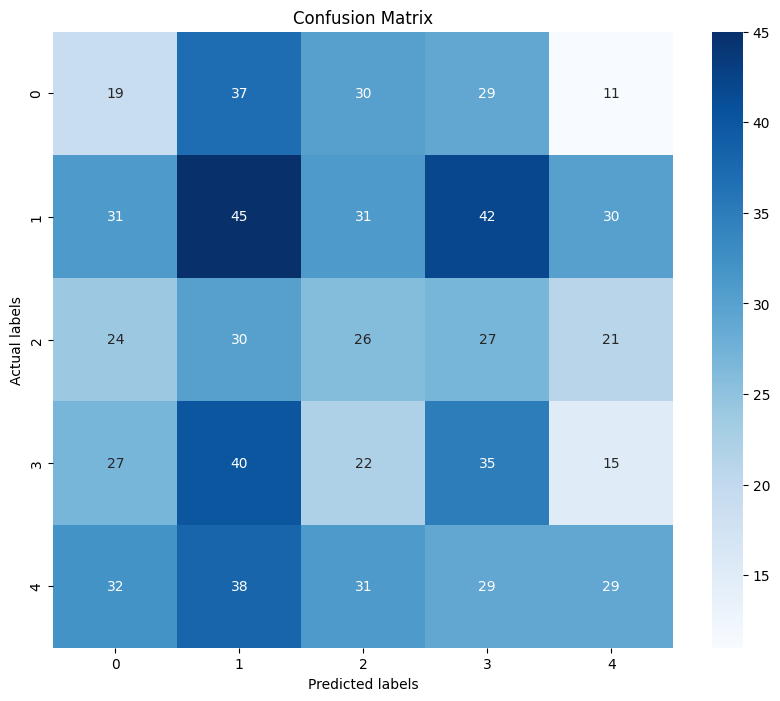

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predicting the validation set
validation_steps = np.math.ceil(validation_generator.samples / validation_generator.batch_size)
predictions = model.predict(validation_generator, steps=validation_steps)
predicted_classes = np.argmax(predictions, axis=1)

# Retrieve the true labels
true_classes = validation_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

# Hyperparameter Tuning
It's not always compulsory to rebuild the model from scratch for every set of hyperparameters, especially if the changes are not related to the model's architecture. This can potentially reduce computational time and resources, by not recreating and recompiling the model each time. 

But the learning rate has to be reset so that the weights can go back to initial state before each training run. Batch size adjustment is also necessary to account for the different number of examples that are processed before the model's internal parameters are updated.

In [10]:
# Function to reset the weights of the model to their initial random state
def reset_weights(model):
    for layer in model.layers: 
        if isinstance(layer, tf.keras.Model):
            reset_weights(layer)
        else:
            for k, initializer in layer.__dict__.items():
                if "initializer" in k:
                    var = getattr(layer, k.replace("_initializer", ""))
                    var.assign(initializer(var.shape, var.dtype))

In [13]:
# Hyperparameters to tune
learning_rates = [0.001, 0.01]
batch_sizes = [32, 64]
num_epochs = 10
results = {}

In [ ]:
# Hyperloop
for lr in learning_rates:
    for bs in batch_sizes:
        # Reseting the model's weights
        reset_weights(model)

        # Updating the learning rate
        tf.keras.backend.set_value(model.optimizer.learning_rate, lr)
        
        # Creating new generators with the current batch size
        train_generator = train_datagen.flow_from_directory(
            dataset_path,
            target_size=(img_height, img_width),
            batch_size=bs,
            class_mode='sparse',
            subset='training'
        )
        validation_generator = train_datagen.flow_from_directory(
            dataset_path,
            target_size=(img_height, img_width),
            batch_size=bs,
            class_mode='sparse',
            subset='validation'
        )
        
        # Fitting the model
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // bs,
            epochs=num_epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // bs
        )
        
        # Storing results
        key = f'LR: {lr}, Batch Size: {bs}'
        results[key] = {
            'Training Accuracy': history.history['accuracy'],
            'Validation Accuracy': history.history['val_accuracy'],
            'Training Loss': history.history['loss'],
            'Validation Loss': history.history['val_loss']
        }

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
Epoch 1/10
91/91 [==============================] - 2725s 30s/step - loss: 1.3220 - accuracy: 0.4166 - val_loss: 1.2822 - val_accuracy: 0.4901
Epoch 2/10
91/91 [==============================] - 2404s 26s/step - loss: 1.1094 - accuracy: 0.5483 - val_loss: 1.1003 - val_accuracy: 0.5426
Epoch 3/10
91/91 [==============================] - 2809s 31s/step - loss: 1.0200 - accuracy: 0.5820 - val_loss: 0.9975 - val_accuracy: 0.6165
Epoch 4/10
83/91 [==========================>...] - ETA: 3:43 - loss: 0.9254 - accuracy: 0.6424